# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0 )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

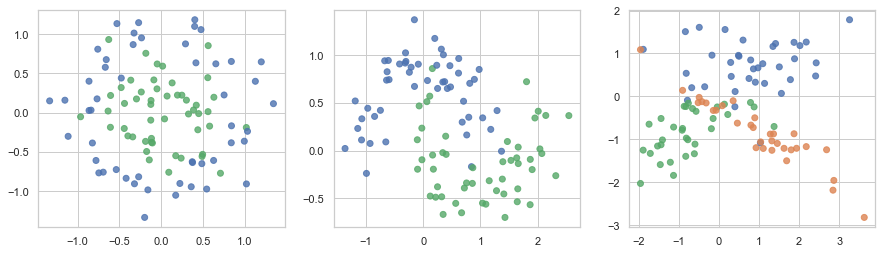

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y, ax):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5, )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
   

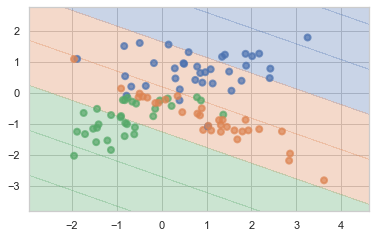

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
fig, ax = plt.subplots(1,1)
plot_surface(lr, X, y, ax)

Accuracy for 0 dataset for train: 1.00000, for test: 0.83333
Accuracy for 1 dataset for train: 1.00000, for test: 0.90000
Accuracy for 2 dataset for train: 1.00000, for test: 0.80000


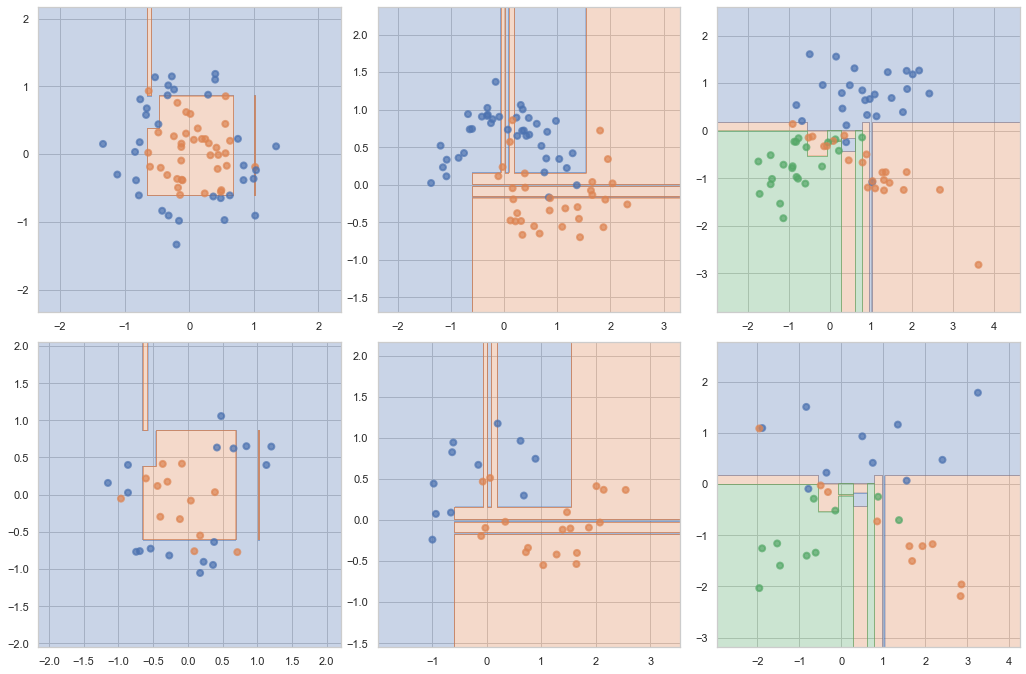

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))


for i in range(3):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    plot_surface(clf, X_train, y_train, axes[0][i])
    plot_surface(clf, X_test, y_test, axes[1][i])
    print(f'Accuracy for {i} dataset for train: {accuracy(y_train, clf.predict(X_train)):.5f}, for test: {accuracy(y_test, clf.predict(X_test)):.5f}')

__Ответ:__ Деревья полностью подстроились под обучающую выборку, т.е. переобучились, особенно если обратить внимание на разделяющие поверхности, которые имеют некоторые отдельные секторы, только с несколькими объектами из обучающей выборки. Фигуры, полученные разделяющими поверхностями не похожи на изображения окружностей для первого набора данных, спиралей для второго и линейного разделимого случая для третьего.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [8]:
def plot_surface_hyp(clf, X, y, ax, depth, sleaf, acc_train, acc_test):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5, )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    ax.set_title(f'depth={depth}, min_s_leaf={sleaf}, acc = {acc_train:.3f}, {acc_test:.3f}')

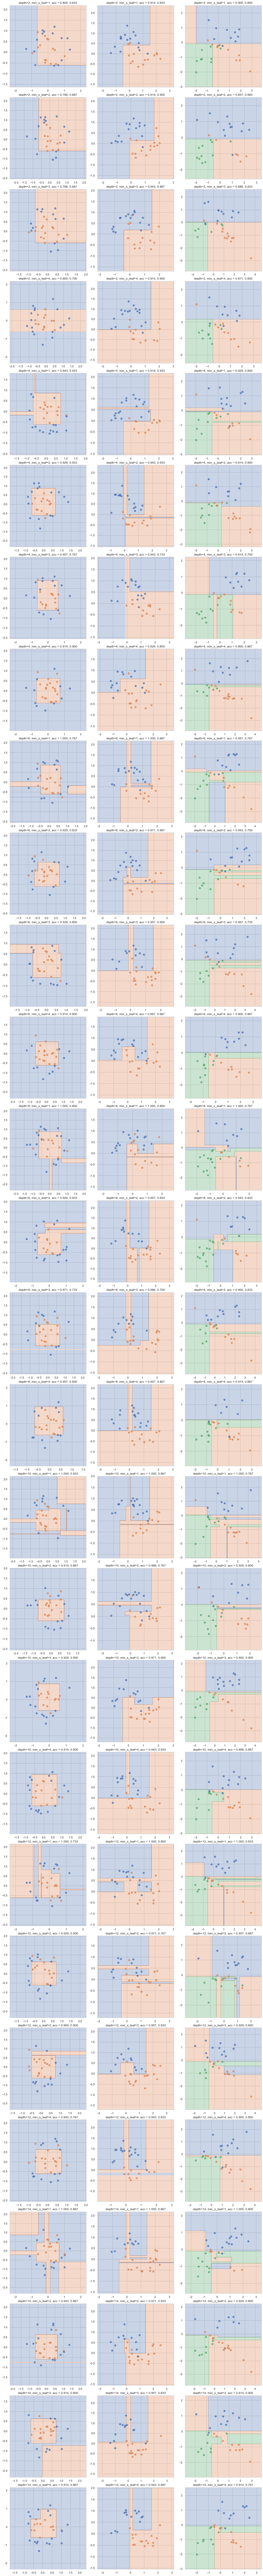

In [9]:
depths = [i for i in range(2, 16, 2)]
samples = [1,2,3,4]
fig, axes = plt.subplots(28, 3, figsize=(15,140))
k=0

for depth in depths:
    for sleaf in samples:
        
        for i in range(3):
            X, y = datasets[i]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
            clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf = sleaf)
            clf.fit(X_train, y_train)
            acc_train = accuracy(y_train, clf.predict(X_train))
            acc_test = accuracy(y_test, clf.predict(X_test))
            plot_surface_hyp(clf, X_test, y_test, axes[k][i], depth, sleaf,acc_train, acc_test)
            
           
        k += 1 

__Ответ:__ Чем меньше модель переобучена, тем больше она обладает обобщающей способностью, то есть способностью давать зорошие предсказания на новых данных. Чем меньше глубина и чем больше минимальное число объектов в листе дерева, тем меньше дерево переобучается. Чем меньше глубина - тем меньше раз дерево делит объектно-признаковое пространство на части. Чем больше min_samples_leaf, тем на большие сегменты делит дерево пространство. Лучшие значения этих гиперпараметров зависят от датасета, т.к. для каждого датасета требуется уникальная разделяющая поверхность. 

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

   Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [10]:
%load_ext autoreload

In [11]:
%autoreload 2
from hw5code import find_best_split

In [12]:
df = pd.read_csv(r"C:\Users\Stepan\Desktop\ФКН Домашка\students.csv")
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [13]:
target = 'UNS'
columns = df.columns[df.columns!=target]

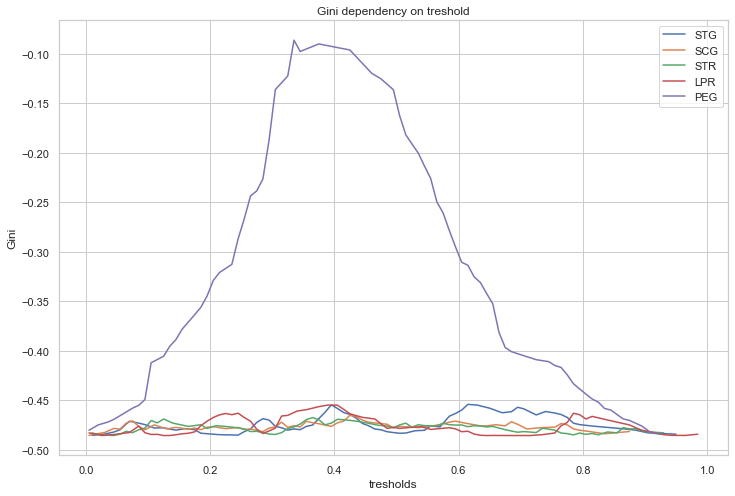

In [14]:
plt.figure(figsize=(12,8))
for column in columns:
    tresholds_iter, gini, _, _ = find_best_split(df[column].to_numpy(), df[target].to_numpy())
    plt.plot(tresholds_iter, gini, label=str(column))
plt.title('Gini dependency on treshold')
plt.xlabel('tresholds')
plt.ylabel('Gini')
plt.legend(loc='best')
plt.show()

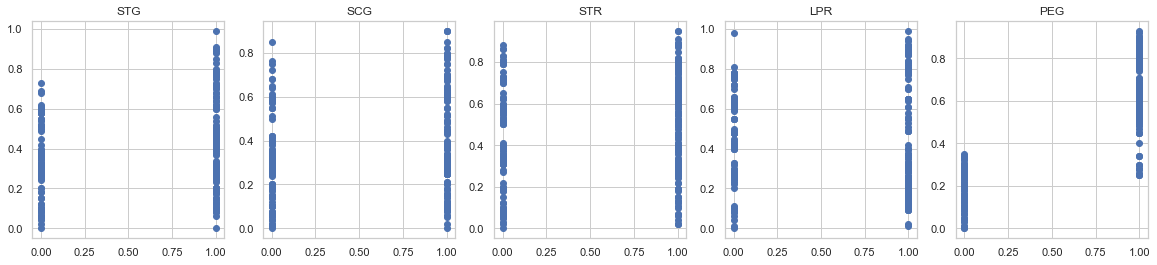

In [15]:
plt.figure(figsize=(20, 4))
for i  in range(len(columns)):
    plt.subplot(1, 5, i+1)
    plt.scatter(df[target], df[columns[i]] )
    plt.title(columns[i])

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Деление нужно производить по признаку PEG. Этот результат согласуется с scatter графиками. У "хороших" признаков есть четко выраженный максимум критерия джини, в отличие от "плохих" признаков.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [16]:
from sklearn.preprocessing import OrdinalEncoder
from hw5code import DecisionTree
from sklearn.metrics import accuracy_score as accuracy
from sklearn.model_selection import cross_val_score

In [17]:
df = pd.read_csv(r"C:\Users\Stepan\Desktop\ФКН Домашка\agaricus-lepiota.data")
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [18]:
target = 'p'
columns = df.drop(target, axis=1).columns

In [19]:
le = OrdinalEncoder()
df[columns] = le.fit_transform(df[columns])

In [20]:
df[target] = df[target].map({'e':0, 'p':1})

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target), df[target], test_size=0.5)
feature_types= ["categorical" for _ in range(len(columns))]

In [22]:
dtree = DecisionTree(feature_types)
dtree.fit(X_train.values, y_train.values)
accuracy(y_test, dtree.predict(X_test.values))

1.0

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [23]:
df = pd.read_csv(r"C:\Users\Stepan\Desktop\ФКН Домашка\tic-tac-toe-endgame.csv")
target = 'V10'
columns = df.drop(target, axis=1).columns

In [24]:
le = OrdinalEncoder()
df[columns] = le.fit_transform(df[columns])

In [25]:
df[target] = df[target].map({ 'negative': 0, 'positive': 1})

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target), df[target], test_size=0.25)
feature_types= ["categorical" for _ in range(X_train.shape[1])]

In [27]:
results = [[], []]
depths = [1,2,3,4, 5, 6, 7, 8]
lists = [range(1, 61, 5), range(10, 75, 5)]
for depth in depths:
    t = []
    for sleaf in lists[0]:
        dtree = DecisionTree(feature_types, max_depth=depth, min_samples_leaf = sleaf)
        dtree.fit(X_train.values, y_train.values)        
        t.append(accuracy(y_test, dtree.predict(X_test.values)))
    results[0].append(t)
    d = []
    for ssplit in lists[1]:
        dtree = DecisionTree(feature_types, max_depth=depth, min_samples_split = ssplit)
        dtree.fit(X_train.values, y_train.values)        
        d.append(accuracy(y_test, dtree.predict(X_test.values)))
    results[1].append(d)

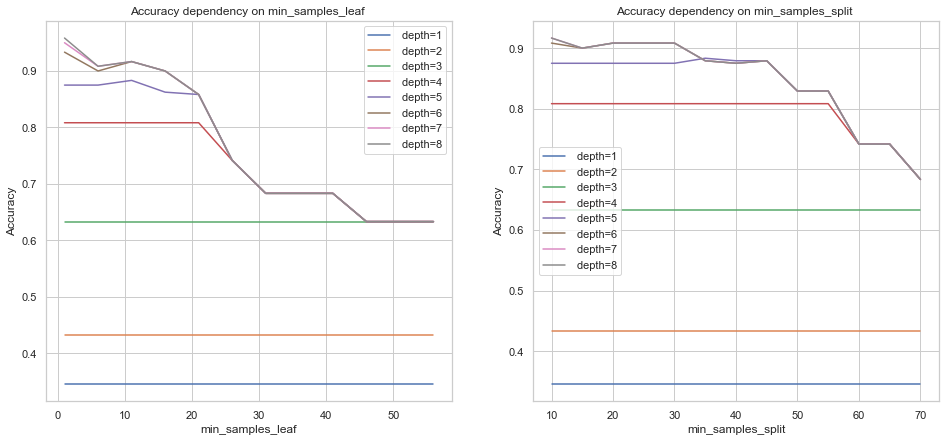

In [28]:
plt.figure(figsize=(16, 7))
xlabels = ['min_samples_leaf', 'min_samples_split']

for i in range(2):
    for j in range(len(depths)):
        plt.subplot(1, 2, i+1)
        plt.plot(lists[i],  results[i][j], label = f' depth={depths[j]}')
        plt.xlabel(xlabels[i])
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy dependency on {xlabels[i]} ')
        plt.legend()
plt.legend()
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [29]:
from sklearn.metrics import make_scorer

In [30]:
df1 = pd.read_csv(r"C:\Users\Stepan\Desktop\ФКН Домашка\agaricus-lepiota.data", names= [
    'poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
    'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
    'spore-print-color', 'population', 'habitat'
                                                                                       ]
)
df2 = pd.read_csv(r"C:\Users\Stepan\Desktop\ФКН Домашка\car.data", names = [
    'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'
] )
df3 = pd.read_csv(r"C:\Users\Stepan\Desktop\ФКН Домашка\nursery.data", names = [
    'parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class'
])
df4 = pd.read_csv(r"C:\Users\Stepan\Desktop\ФКН Домашка\tic-tac-toe-endgame.csv")

datasets = {'df1': df1, 'df2': df2,'df3': df3, 'df4': df4}
target = {'df1': 'poisonous', 'df2': 'class', 'df3': 'class', 'df4': 'V10' }

In [31]:
df1[target['df1']] = df1[target['df1']].map({'e':0, 'p':1})
df2[target['df2']]  = df2[target['df2']].map({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})
df3[target['df3']] = df3[target['df3']].map({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1})
df4[target['df4']] = df4[target['df4']].map({ 'negative': 0, 'positive': 1})

In [32]:
columns = {'df1': df1.drop(columns=target['df1']).columns, 'df2': df2.drop(columns=target['df2']).columns,
          'df3': df3.drop(columns=target['df3']).columns, 'df4': df4.drop(columns=target['df4']).columns }
for i in ['df1', 'df2', 'df3', 'df4']:
    df = datasets[i]
    le = OrdinalEncoder()
    df[columns[i]] = le.fit_transform(df[columns[i]])
    
    

In [33]:
results = pd.DataFrame(columns=['real', 'categorical', 'ohe', 'sklearn'], index = datasets.keys())

for i in ['df1', 'df2', 'df3', 'df4']:
    df = datasets[i]
    feature_types = ['real']*(df.shape[1]-1)
    acc_real = cross_val_score(DecisionTree(feature_types), X=df.drop(columns=target[i]).values, y=df[target[i]].values, 
                               scoring=make_scorer(accuracy), cv=10)
    results.loc[i, 'real'] = acc_real.mean()
    
    feature_types = ['categorical']*(df.shape[1]-1)
    acc_cat = cross_val_score(DecisionTree(feature_types), df.drop(columns=target[i]).values, df[target[i]].values, 
                              scoring=make_scorer(accuracy), cv=10)
    results.loc[i, 'categorical'] = acc_cat.mean()
    
    feature_types = ['real']*(df.shape[1]-1)
    X_ohe = pd.get_dummies(df.drop(columns=target[i]))
    acc_ohe = cross_val_score(DecisionTree(feature_types), X_ohe.values, df[target[i]].values, scoring=make_scorer(accuracy), cv=10)
    results.loc[i, 'ohe'] = acc_ohe.mean()

    acc_sklearn = cross_val_score(DecisionTreeClassifier(), df.drop(columns=target[i]), df[target[i]], 
                                  scoring=make_scorer(accuracy), cv=10)
    results.loc[i, 'sklearn'] = acc_sklearn.mean()
    
    
    
    
    
    

In [34]:
results

,real,categorical,ohe,sklearn
df1,0.999261,1.0,0.999261,0.95595
df2,0.942647,0.967546,0.942647,0.942707
df3,0.999691,0.999846,0.999691,0.999691
df4,0.467533,0.541458,0.467533,0.756075


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Хуже всего работает real. Это связано с тем, что Label Encoder ранжирует элементы, не ориентируясь на значение целевой переменной. Тем самым категории признака, при которых объект склонен к положительному классу или наоборот, могут лежать по разные стороны от любого выбранного порога разбиения признака. Тип real никак дополнительно не обрабатывает признаки, в отличие от categorical. Categorical работает лучше всего, не считая последнего датасета. Categorical дополнительно обрабатывает имеющиеся категории, сортируя их по доле положительных объектов в категории. Также, из-за того что мы случайным образом отбираем тренировочную и валидационную выборку, мы можем получать разное категории в тренировочном наборе и валидационном. То есть при обучении мы можем не учесть какую либо категорию, тем самым мы составим неполный список категорий, по которым нужно разбивать узел или в случае типа 'real' завысим или занизим порог разбиения. Если категорий довольно много, то этой проблемы не миновать. Также мы никак не ограничивали модель на переобучение. Условием останова в нашем дереве является либо признак, состоящий из одной категории, либо объекты в узле принадлежат к одному классу. То есть если в каком то узле есть объекты одного класса, кроме одного, то разбиение продолжиться, однако отщепление одного или очень малого количества объектов чаще всего говорит о переобучении. 